In [3]:
import networkx as nx
import numpy as np
from jaccard_implementation import jaccard_similarity_communities_optimal
from newman_greedy import newman_greedy_distance
from cluster_graphs import generate_full_cluster_graph_same_size
import matplotlib.pyplot as plt
from color_communites import color_communities

In [90]:
times_to_average = 1

cluster_values = np.linspace(3,16,times_to_average).astype(int)
cluster_node_values = np.linspace(1,50,50).astype(int)
gamma_values = np.linspace(0.0001,0.1,100)

optimal_gammas = np.zeros(50)

for clusters in cluster_values:
    for i, cluster_nodes in enumerate(cluster_node_values):
        optimal_gamma = None 
        max_accuracy = 0
        for gamma in gamma_values:
            graph = generate_full_cluster_graph_same_size(clusters, cluster_nodes)
            actual_communities = [[k * cluster_nodes + i for i in range(cluster_nodes)] for k in range(clusters)]
            calculated_communities = newman_greedy_distance(graph, gamma)
            accuracy = jaccard_similarity_communities_optimal(actual_communities, calculated_communities)
            if accuracy > max_accuracy:
                max_accuracy = accuracy
                optimal_gamma = gamma
        optimal_gammas[i] += optimal_gamma

optimal_gammas = optimal_gammas / times_to_average


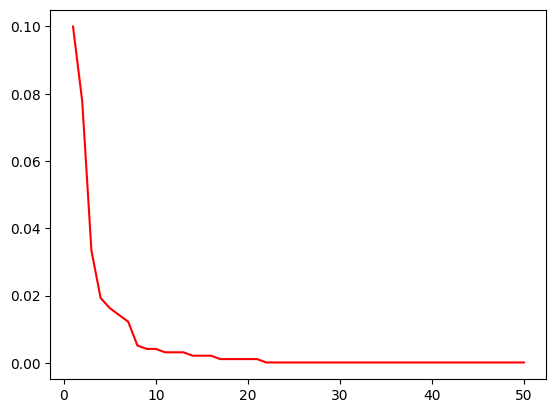

In [91]:
plt.plot(cluster_node_values, optimal_gammas, c='red')
plt.savefig('./plots/gamma_wrt_cluster_nodes.pdf')



In [92]:
# exponential decay optimisation: find c,l,k so that c*exp(-l* gamma) + k best describes the optimal_gammas array

from scipy.optimize import curve_fit

def model(x,c,l):
    return c*np.exp(-l*x)

params, covariance = curve_fit(model, cluster_node_values, optimal_gammas, p0=[1,1])
c_opt, l_opt = params

print(c_opt, l_opt)

0.1616558536042243 0.4500547630497226


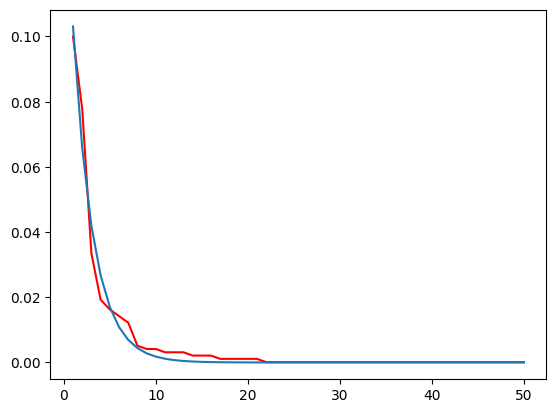

In [95]:
plt.plot(cluster_node_values, optimal_gammas, c='red')
x = np.linspace(1,50,50)
plt.plot(x, c_opt*np.exp(-l_opt*x))
plt.savefig('./plots/gammas_aproximations.pdf')

In [51]:
# optimal gamma over graph size

sizes = np.linspace(1,100,30)
cluster_values = [1,2,5,10]
gamma_values = np.linspace(0.0000000000001,0.0001,100)
optimal_gammas = np.zeros(30)

for i, size in enumerate(sizes):
    max_accuracy = 0
    optimal_gamma = None
    for clusters in cluster_values:
        for gamma in gamma_values:
            # FIX (it returns optimal gamma of last cluster) we want average of the clusters 
            graph = generate_full_cluster_graph_same_size(clusters, cluster_nodes)
            actual_communities = [[k * cluster_nodes + i for i in range(cluster_nodes)] for k in range(clusters)]
            calculated_communities = newman_greedy_distance(graph, gamma)
            accuracy = jaccard_similarity_communities_optimal(actual_communities, calculated_communities)
            if accuracy > max_accuracy:
                max_accuracy = accuracy
                optimal_gamma = gamma
    optimal_gammas[i] += optimal_gamma
    print(optimal_gamma)

1e-13
1e-13


KeyboardInterrupt: 

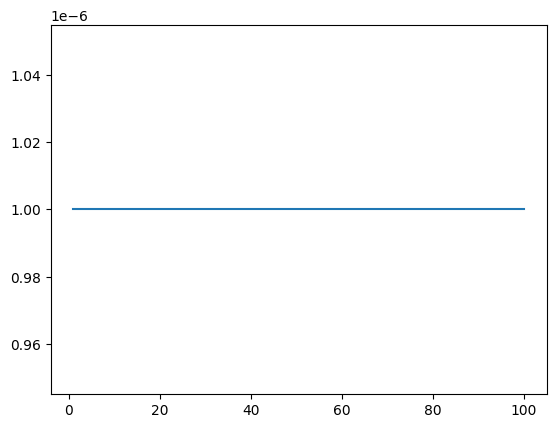

In [49]:
plt.plot(sizes, optimal_gammas)

[[np.int64(0)], [np.int64(1)], [np.int64(2)], [np.int64(3)], [np.int64(4)], [np.int64(5)], [np.int64(6)], [np.int64(7)], [np.int64(8)], [np.int64(9)], [np.int64(10)], [np.int64(11)], [np.int64(12)], [np.int64(13)], [np.int64(14)], [np.int64(15)], [np.int64(16)], [np.int64(17)], [np.int64(18)], [np.int64(19)], [np.int64(20)], [np.int64(21)], [np.int64(22)], [np.int64(23)], [np.int64(24)], [np.int64(25)], [np.int64(26)], [np.int64(27)], [np.int64(28)], [np.int64(29)]]


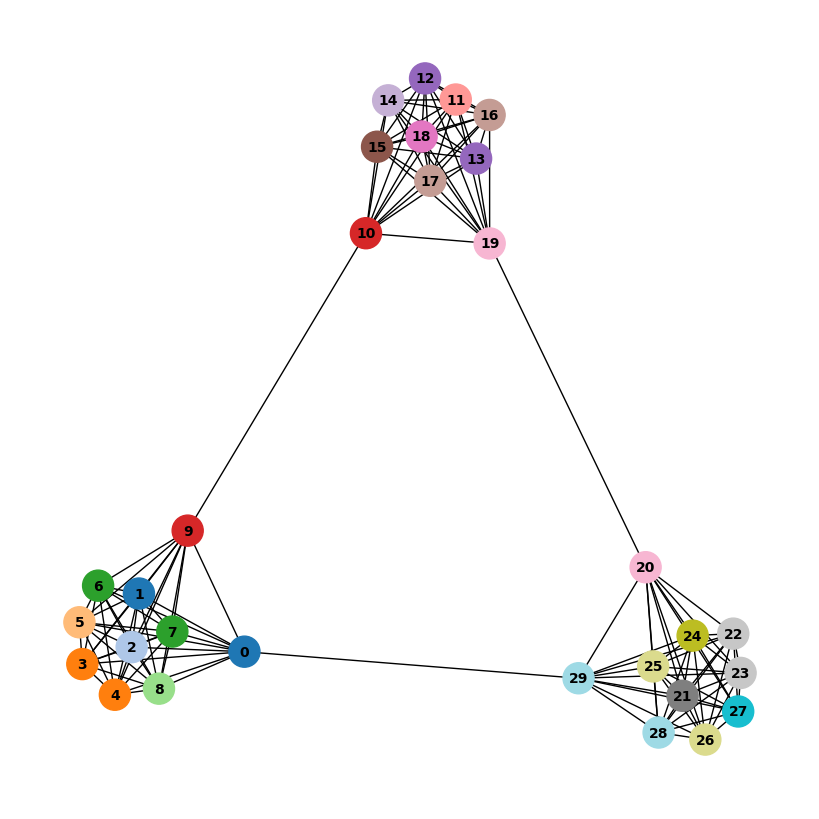

In [32]:
gamma = 0.02
clusters = 3
cluster_nodes = 10
g = generate_full_cluster_graph_same_size(clusters, cluster_nodes)
comm = newman_greedy_distance(g, gamma)
print(comm)
color_communities(g,comm)
plt.savefig('./plots/gammachange'+str(clusters)+','+str(cluster_nodes)+'gamma='+str(gamma)+'.pdf')

[[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11, 0], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23, 12], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35, 24], [40, 39, 38, 37], [46, 45, 44, 43], [52, 51, 50, 49], [58, 57, 56, 55], [60, 59, 54, 53, 48], [66, 65, 64, 63, 62, 61], [70, 69, 68, 67], [71, 47, 42, 41, 36]]


<Figure size 640x480 with 0 Axes>

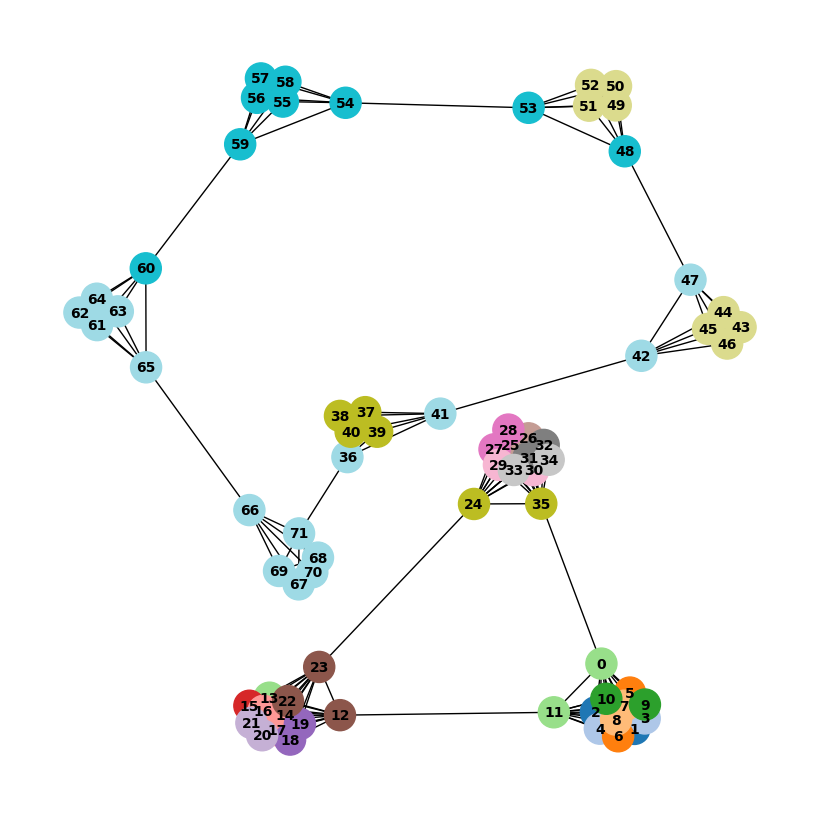

In [42]:
# same size, different cluster size
G1 = generate_full_cluster_graph_same_size(3,12)
G2 = generate_full_cluster_graph_same_size(6,6)
G = nx.disjoint_union(G1, G2)

gamma = 0.01

plt.figure()
comm = newman_greedy_distance(G, gamma)
print(comm)
color_communities(G, comm)
plt.savefig('./plots/nonconnected_ssize_dcs'+str(gamma)+'.pdf')

[[4, 0, 3, 2, 1], [9, 5, 8, 7, 6], [14, 10, 13, 12, 11], [19, 15, 18, 17, 16], [24, 20, 23, 22, 21], [29, 25, 28, 27, 26], [34, 30, 33, 32, 31], [39, 35, 38, 37, 36], [44, 40, 43, 42, 41], [49, 45, 48, 47, 46], [54, 50, 53, 52, 51], [59, 55, 58, 57, 56], [64, 60, 63, 62, 61]]


<Figure size 640x480 with 0 Axes>

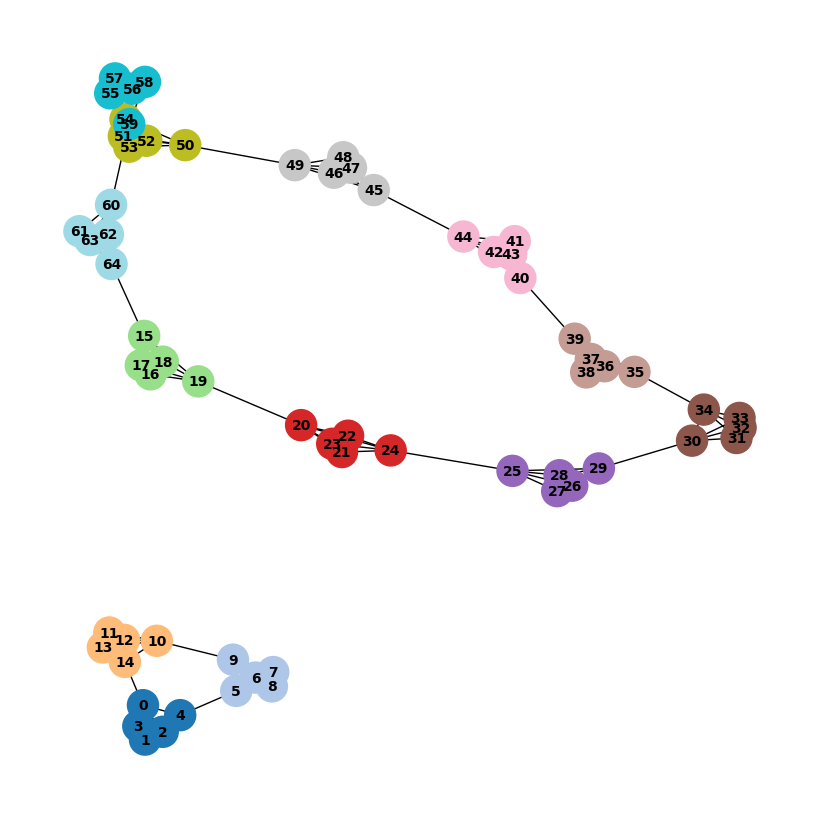

In [36]:
# same cluster size, different size
G1 = generate_full_cluster_graph_same_size(3,5)
G2 = generate_full_cluster_graph_same_size(10,5)
G = nx.disjoint_union(G1, G2)

gamma = 0.02

plt.figure()
comm = newman_greedy_distance(G, gamma)
print(comm)
color_communities(G, comm)
plt.savefig('./plots/nonconnected_scs_dsize'+str(gamma)+'.pdf')